# Linear Regression Assignment

## Bike Sharing Dataset

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## I. Data understanding

Import the required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Print all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('bike_dataset.csv');

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
# Check for mising value and sanitization of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*There is no missing values on all of the columns, we don't need to fill out missing values*

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## II. Data Cleaning

Let's clean data some unused columns and map categorical columns to readable value

- Remove `dteday` column since we already have year, month, weekday column

In [8]:
df.drop('dteday', inplace=True, axis=1)

- Remove `casual` and `registered` column because our target variable is `cnt` 

In [9]:
df.drop(['casual', 'registered'], inplace=True, axis=1)

- Remove `instant` column since it is just an indexing column

In [10]:
df.drop('instant', inplace=True, axis=1)

- Mapping `season`, `weekday`, `month` to readable value

In [11]:
df.season = df.season.map({ 1:'spring', 2:'summer', 3:'fall', 4:'winter' })
df.weekday = df.weekday.map({ 0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat' })
df.mnth = df.mnth.map({ 1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec' })
df.weathersit = df.weathersit.map({ 1:'good', 2:'moderate', 3:'bad', 4:'terrible' })

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## III. Data Visualization

### Import required libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing Numeric Variables

Let's create a pairplot of all the numerical variables

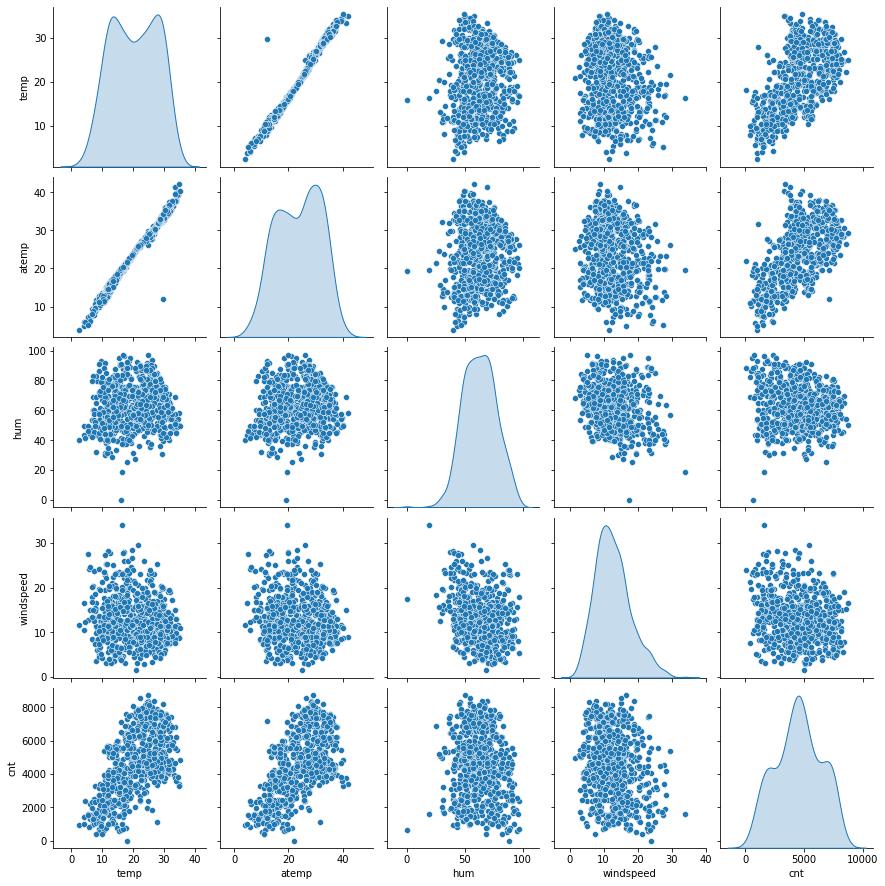

In [14]:
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df, vars=numerical_vars, diag_kind='kde');
plt.show()

#### Insights:
- We can see there is a **Linear Regression** between `temp` and `cnt`, `atemp` and `cnt`

### Visualizing Categorical Variables

Let's visualizing categorical variables using `subplot`

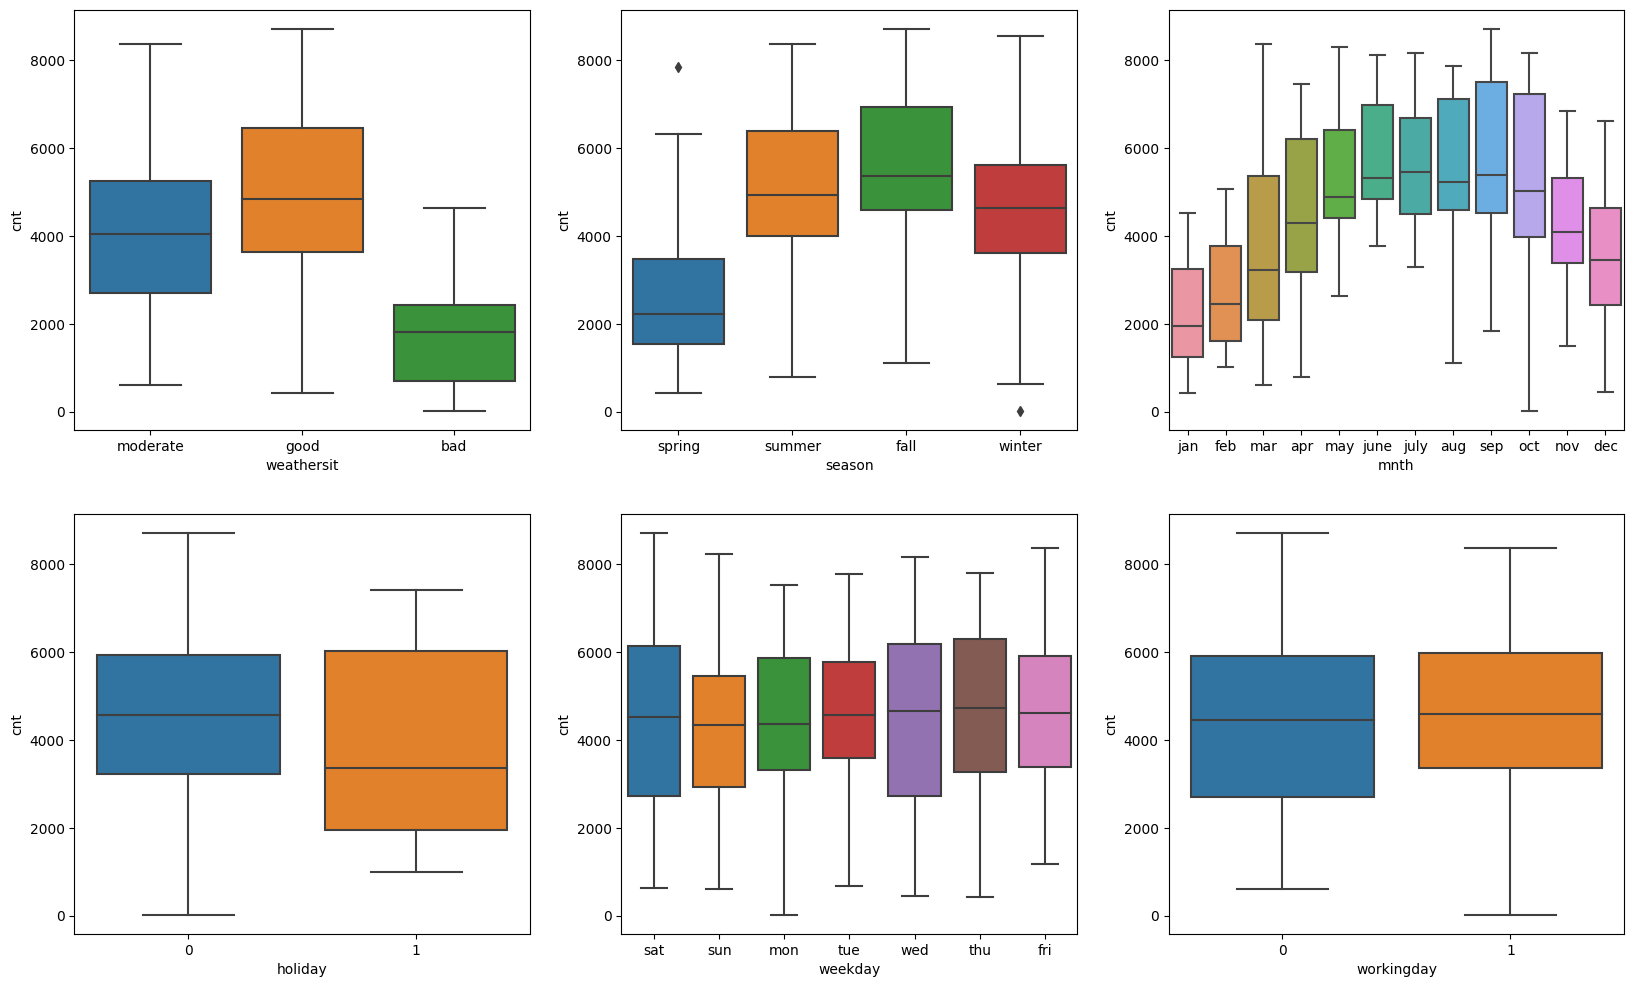

In [15]:
categorical_vars = ['weathersit', 'season', 'mnth', 'holiday', 'weekday', 'workingday']
plt.figure(figsize=(20, 12))
for i, categorical_var in enumerate(categorical_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x = categorical_var, y = 'cnt', data = df)
plt.show()

#### Insights:
- `weathersit`: The demand for shared bikes dropped drastically during bad weather, when it was high in good and moderate weather, indicates that weather could be a good preditor
- `season`: The demand for shared bikes was highest in fall, and lowest in spring
- `month`: The demand reached its peak during the middle of year, from June to September
- `holiday`: The median of the demand is lower in holiday compared to non-holiday day
- `weekday`: We can see little difference in demand for shared bikes between days in week
- `workingday`: Booking trends seemed to be almost equal between working and non-working day

## IV. Data Preparation

**Creating Dummy Variables**

In [16]:
## Convert column that need dummy variables creation to `category` data type
for variable in ['weathersit', 'season', 'mnth', 'weekday']:
    df[variable] = df[variable].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
## Creating dummy variables using pd.get_dummies
df = pd.get_dummies(df, drop_first=True)

In [19]:
## Check the info of newly created dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_july            730 non-null    uin

## V. Data Splitting

Let's do a train-test splitting

In [20]:
from sklearn.model_selection import train_test_split

## Set random seed for producible train-set dataset
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

We will use `Min-Max scaling` to scale the features

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Use the numerical_vars variable created in previous step
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# Print the top row of train dataframe
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [22]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that all the columns in the train dataset have the max value of `1.0` and min value of `0.0`

### Correlation matrix
Let's draw a correlation matrix to see how features is correlated

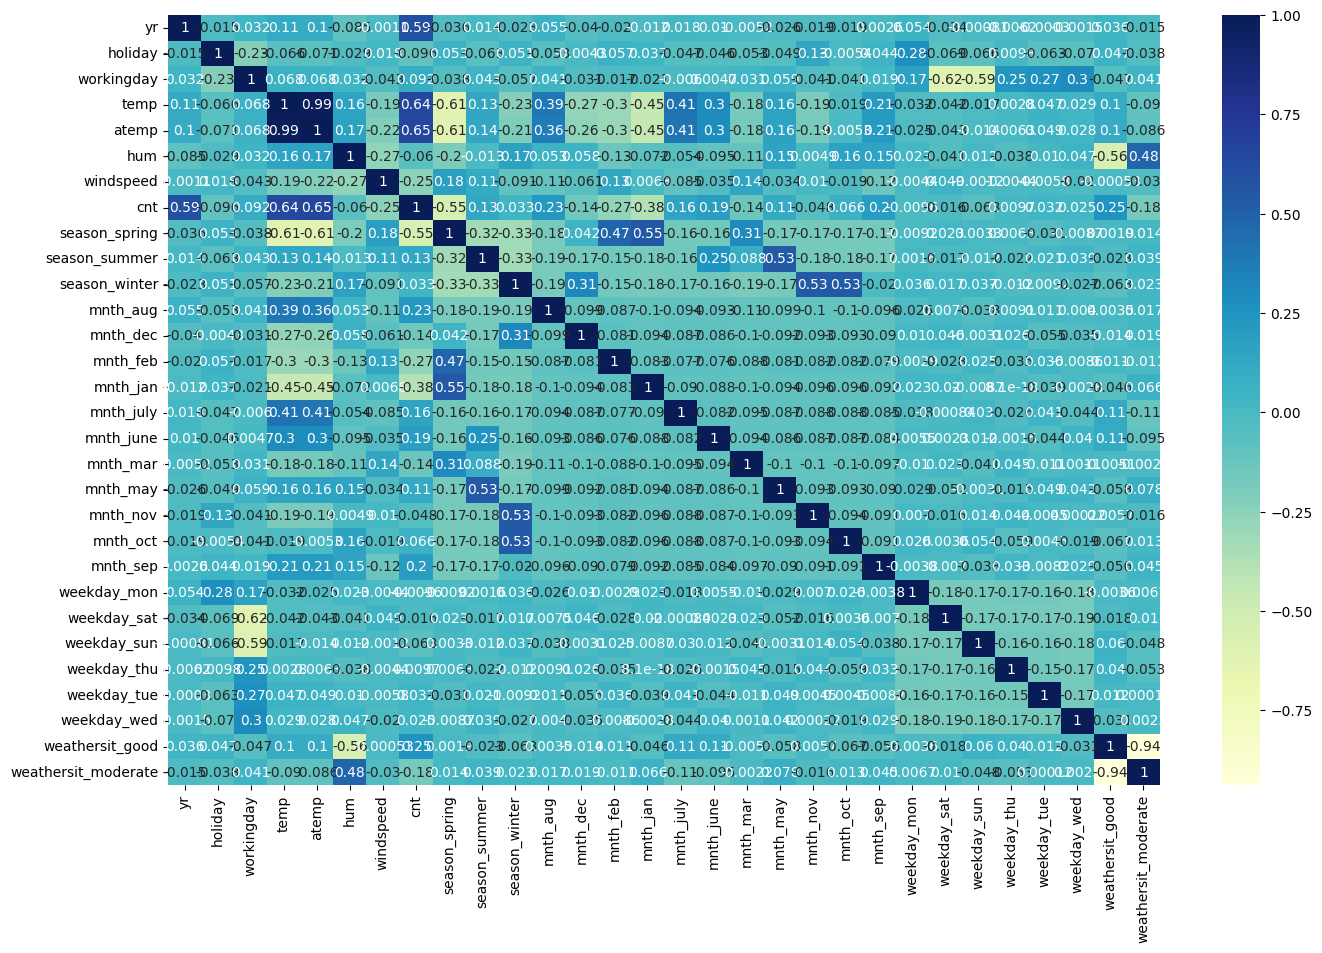

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y for building model

In [24]:
## Drop the target variable
y_train = df_train.pop('cnt')
X_train = df_train

## VI. Building the model

### RFE selections

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', False, 7),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 3),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 6),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [27]:
# Print the columnns that support RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [28]:
# Only keep column with RFE supported in the x train dataset
X_train = X_train[col]
# Create new X_train to use for dropping columns later
X_train_new = X_train

### Adding all the variables to the model

We will start by adding all of the variables to the model

In [29]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

def build_model(x, y):
    # Add constant to train dataset
    X_train_lm = sm.add_constant(x)
    return sm.OLS(y_train, X_train_lm).fit()

lr, X_train_lm = build_model(X_train_new, y_train)

TypeError: cannot unpack non-iterable RegressionResultsWrapper object

In [ ]:
# Let's check the summary of the linear regression model
lr.summary()

### Checking VIF

Let's check the VIF to see how much the feature variables are correlated with each other

In [ ]:
# Import required method
from statsmodels.stats.outliers_influence import variance_inflation_factor

def drawVIFTable(x):    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
drawVIFTable(X_train_new)

### Dropping the variables and updating the model

Let's create a function that will:
- Drop a column from current x
- Build new model, print the summary
- Draw VIF table for new X data

In [ ]:
def drop_column_and_rebuild_model(x, y, column_to_drop):
    # Drop column
    new_x = x.drop(column_to_drop, 1);
    lr = build_model(new_x, y_train)
    # Print model
    print(lr.summary())
    # Print VIF
    drawVIFTable(new_x)
    # Return x and the model for reuse
    return new_x, lr

In [ ]:
# Drop workingday because of high VIF (65.42) and high p-Value (0.092)
X_train_new, lr, X_train_lm = drop_column_and_rebuild_model(X_train_new, y_train, 'workingday')

In [ ]:
# Drop mnth_mar because of high p-Value (0.342)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'mnth_mar')

In [ ]:
# Drop mnth_may because of high p-Value (0.413)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'mnth_may')

In [ ]:
# Drop weekday_sat because of high p-Value (0.418)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'weekday_sat')

In [ ]:
# Drop weekday_mon because of high p-Value (0.141)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'weekday_mon')

In [ ]:
# Drop weathersit_good because of high VIF (15.78)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'weathersit_good')

In [ ]:
# Drop mnth_nov because of high p-Value (0.229)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'mnth_nov')

In [ ]:
# Drop mnth_dec because of high p-Value (0.271)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'mnth_dec')

In [ ]:
# Drop mnth_jan because of high p-Value (0.091)
X_train_new, lr = drop_column_and_rebuild_model(X_train_new, y_train, 'mnth_jan')

### Insights
Overall, the model looks good, all of the features has a very low VIF and p-value. We will consider this model is our final model.

**F-Statistics value of 176.7 (which is greater than 1) and the p-value of 5.33e-164 i.e almost equals to zero, indicates that the overall model is significant**

## VII. Residual Analysis of train data 

Let's find out if the error terms are normally distributed

In [ ]:
X_train_lm = sm.add_constant(X_train_new);
y_train_predict = lr.predict(X_train_lm);

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)       

From the above graph, we can see that Residuals are normally distributed. So our assumption for Linear Regression is valid.

### Multiconlinearity

In [ ]:
drawVIFTable(X_train_new)

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

VIFs are less than 5 which is witin the acceptable range (except for `temp`, but its VIF is `5.14` and `temp` shows a linear regression with target variable, so we decided to keep this feature)

## VIII. Making Predictions

In [ ]:
# Transform test dataset using MinMax Scaling
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [ ]:
# Split to X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lr.predict(X_test_new)

## IX. Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

### Equation of best fitted line

In [ ]:
round(lr.params,4)

We can conclude that the equation of best fitted line is

$cnt = 0.1927 + 0.2390 * yr - 0.0909 * holiday + 0.5038 * temp - 0.1777 * windspeed - 0.0582 * season\_spring + 0.0493 * season\_summer + 0.0757 * season\_winter - 0.0526 * mnth\_july + 0.0663 * mnth\_sep - 0.0414 * weekday\_sun - 0.0697 * weathersit\_moderate$

### R^2 calculation

**Let's check the R^2 for test dataset**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred);
r2

**Adjusted R^2 for test dataset**

In [ ]:
n = X_test.shape[0] # Number of rows
p = X_test.shape[1] # Number of features (Num of columns)

adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
adjusted_r2

### Final Result

- Train R^2: **0.796**
- Train Adjusted R^2: **0.792**
- Test R^2: **0.779**
- Train Adjusted R^2: **0.745**

## X. Conclusion

After our final model, we can see the top predictor variables:
- **Temperature** `temp` has a coefficient value of 0.5038, which indicates that it is a strong predictor variable influence the shared bike demand
- **Year** `year` has a coefficient value of 0.2390, that means the demand for shared bike will increase as year increase
- **Windspeed** `windspeed` has a coefficient value of -0.1777, indicates that strong wind will affect the booking of shared bikes